## Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import RobustScaler
from collections import Counter
from wordcloud import WordCloud
import requests
import os
from bs4 import BeautifulSoup
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
import warnings

# Suppress warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the path to your CSV files on Google Drive
eda_data = '/content/drive/My Drive/DATA_606/data/drug_patent_dataset.csv'

# Load the data into pandas DataFrames
eda_data = pd.read_csv(eda_data)

## Basic Exploration

In [ ]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527664 entries, 0 to 527663
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_group               527664 non-null  int64  
 1   ingredient                  527664 non-null  object 
 2   strength                    527664 non-null  object 
 3   dosage                      527664 non-null  object 
 4   route                       527664 non-null  object 
 5   mdr_unit_type               527664 non-null  object 
 6   weighted_average_of_amps    527664 non-null  float64
 7   aca_ful                     527664 non-null  float64
 8   package_size                527664 non-null  float64
 9   ndc                         527664 non-null  object 
 10  year                        527664 non-null  int64  
 11  month                       527664 non-null  int64  
 12  gnrc_name                   527664 non-null  object 
 13  tot_mftr      

In [ ]:
print("Drug Data Shape:", eda_data.shape)

Drug Data Shape: (527664, 31)


In [ ]:
# Print column names for drug_data DataFrame
print(eda_data.columns)

Index(['product_group', 'ingredient', 'strength', 'dosage', 'route',
       'mdr_unit_type', 'weighted_average_of_amps', 'aca_ful', 'package_size',
       'ndc', 'year', 'month', 'gnrc_name', 'tot_mftr', 'tot_spndng',
       'tot_clms', 'tot_benes', 'tot_dsg_unts', 'avg_spnd_per_dsg_unt_wghtd',
       'avg_spnd_per_clm', 'avg_spnd_per_bene', 'appl_no', 'product_no',
       'trade_name', 'te_code', 'type', 'approval_date', 'patent_expire_date',
       'applicant', 'applicant_full_name', 'inflation_rate'],
      dtype='object')


In [ ]:
eda_data.head(5)

product_group    ingredient strength   dosage route mdr_unit_type  \
0           3236    olanzapine    7.5mg   tablet  oral           tab   
1           2095   fluconazole    150mg   tablet  oral           tab   
2           3232    olanzapine     20mg   tablet  oral           tab   
3           1953    gabapentin    100mg  capsule  oral           cap   
4           2276  azithromycin    500mg   tablet  oral           tab   

   weighted_average_of_amps   aca_ful  package_size            ndc  ...  \
0                  0.103186  0.180576          30.0    62756055383  ...   
1                  0.468832  1.072880           1.0    16714069210  ...   
2                  0.587350  1.027863          30.0    33342007207  ...   
3                  0.024458  0.042802         500.0  71093-0120-05  ...   
4                  0.677082  1.410490          30.0  50268-0104-13  ...   

    appl_no  product_no    trade_name  te_code   type  approval_date  \
0  206711.0         1.0    olanzapine      NaN  discn     2016-08-30   
1   19949.0         1.0      diflucan       ab     rx     1990-01-29   
2  206711.0         1.0    olanzapine      NaN  discn     2016-08-30   
3   75350.0         1.0    gabapentin       ab     rx     2003-09-12   
4  211791.0         1.0  azithromycin       ab     rx     2020-01-28   

   patent_expire_date          applicant          applicant_full_name  \
0          2036-08-30  ajanta pharma ltd            ajanta pharma ltd   
1          2010-01-29             pfizer      pfizer central research   
2          2036-08-30  ajanta pharma ltd            ajanta pharma ltd   
3          2023-09-12  actavis elizabeth        actavis elizabeth llc   
4          2040-01-28            alembic  alembic pharmaceuticals ltd   

   inflation_rate  
0             2.1  
1             2.2  
2             2.8  
3             1.8  
4             1.9  

[5 rows x 31 columns]

In [ ]:
eda_data.tail(5)

product_group  ingredient strength  dosage route mdr_unit_type  \
527659           2398  topiramate     50mg  tablet  oral           tab   
527660           4072   valsartan     80mg  tablet  oral           tab   
527661           2353   meloxicam     15mg  tablet  oral           tab   
527662             60  alprazolam   0.25mg  tablet  oral           tab   
527663           2398  topiramate     50mg  tablet  oral           tab   

        weighted_average_of_amps   aca_ful  package_size            ndc  ...  \
527659                  0.065687  0.114952        1000.0  69097-0123-15  ...   
527660                  0.647782  1.133619          90.0  00378-5813-77  ...   
527661                  0.011474  0.023160           1.0  60687-0199-11  ...   
527662                  0.021103  0.036930        1000.0    59762371904  ...   
527663                  0.065687  0.114952          60.0  69097-0817-03  ...   

        appl_no  product_no  trade_name  te_code  type  approval_date  \
527659  20505.0         4.0     topamax       ab    rx     1996-12-24   
527660  21283.0         4.0      diovan       ab    rx     2002-08-14   
527661  77920.0         1.0   meloxicam       ab    rx     2006-07-19   
527662  74342.0         1.0  alprazolam       ab    rx     1993-10-31   
527663  20505.0         4.0     topamax       ab    rx     1996-12-24   

        patent_expire_date          applicant  \
527659          2016-12-24     janssen pharms   
527660          2022-08-14           novartis   
527661          2026-07-19   aiping pharm inc   
527662          2013-10-31  actavis elizabeth   
527663          2016-12-24     janssen pharms   

                                      applicant_full_name  inflation_rate  
527659                        janssen pharmaceuticals inc             7.9  
527660                      novartis pharmaceuticals corp             2.3  
527661                          aiping pharmaceutical inc             7.5  
527662  actavis elizabeth llc an indirect wholly owned...             2.9  
527663                        janssen pharmaceuticals inc             7.9  

[5 rows x 31 columns]

In [ ]:
# Print the count of unique values for each column in drug_data
eda_data.nunique()

product_group                   716
ingredient                      274
strength                        164
dosage                           27
route                             9
mdr_unit_type                     6
weighted_average_of_amps      31906
aca_ful                       30440
package_size                     86
ndc                           23547
year                              5
month                            12
gnrc_name                       274
tot_mftr                         39
tot_spndng                     1199
tot_clms                       1196
tot_benes                      1197
tot_dsg_unts                   1199
avg_spnd_per_dsg_unt_wghtd     1195
avg_spnd_per_clm               1187
avg_spnd_per_bene              1196
appl_no                         339
product_no                        9
trade_name                      296
te_code                           6
type                              3
approval_date                   333
patent_expire_date              332
applicant                       134
applicant_full_name             138
inflation_rate                   39
dtype: int64

In [ ]:
eda_data.describe()

product_group  weighted_average_of_amps        aca_ful   package_size  \
count  527664.000000             527664.000000  527664.000000  527664.000000   
mean     3251.332382                  0.654302       1.247067     237.394350   
std      2721.038900                  3.611645       6.573138     574.919786   
min        32.000000                  0.000114       0.006410       1.000000   
25%      1705.000000                  0.047489       0.094145      30.000000   
50%      2399.000000                  0.105985       0.224610     100.000000   
75%      4072.000000                  0.295887       0.608722     100.000000   
max     13694.000000                110.621502     193.587629   22500.000000   

                year          month       tot_mftr    tot_spndng  \
count  527664.000000  527664.000000  527664.000000  5.276640e+05   
mean     2020.006275       6.498279      19.415204  2.062929e+08   
std         1.415872       3.457521       9.723413  2.497772e+08   
min      2018.000000       1.000000       2.000000  7.301925e+04   
25%      2019.000000       3.000000      12.000000  4.468983e+07   
50%      2020.000000       6.000000      18.000000  1.139830e+08   
75%      2021.000000      10.000000      25.000000  2.695004e+08   
max      2022.000000      12.000000      54.000000  1.533957e+09   

           tot_clms     tot_benes  tot_dsg_unts  avg_spnd_per_dsg_unt_wghtd  \
count  5.276640e+05  5.276640e+05  5.276640e+05               527664.000000   
mean   9.111930e+06  2.199087e+06  6.803920e+08                   27.736843   
std    1.309339e+07  3.090358e+06  1.059906e+09                   93.581863   
min    1.950000e+02  5.500000e+01  2.506000e+03                    0.010400   
25%    7.479780e+05  1.840570e+05  4.723880e+07                    2.241900   
50%    3.668420e+06  7.054920e+05  2.014488e+08                    5.085900   
75%    9.406340e+06  2.823698e+06  6.394956e+08                   10.583000   
max    6.483012e+07  1.589476e+07  4.656730e+09                  639.123200   

       avg_spnd_per_clm  avg_spnd_per_bene        appl_no     product_no  \
count     527664.000000       527664.00000  527664.000000  527664.000000   
mean         514.419700         2632.09050   94837.722407       1.728526   
std          707.842669         4764.22073   80085.553466       1.624328   
min            2.860000            5.61000   12093.000000       1.000000   
25%          156.560000          626.83000   20897.000000       1.000000   
50%          348.860000         1374.44000   75034.000000       1.000000   
75%          697.390000         3240.64000  202554.000000       1.000000   
max        14701.250000       118393.14000  218149.000000       9.000000   

       inflation_rate  
count   527664.000000  
mean         3.656882  
std          2.643125  
min          0.100000  
25%          1.700000  
50%          2.400000  
75%          6.200000  
max          9.100000

## Data Cleaning

### Missing values

In [ ]:
# Drug Data Missing Values Summary
missing_summary = pd.DataFrame(
    {
        "Column Name": eda_data.columns,
        "Null or NaN Values": eda_data.isnull().sum(),  # Count of NaN/null values
        "Blank Spaces": (eda_data == "").sum(),  # Count of blank spaces
        "Total Missing": eda_data.isnull().sum() + (eda_data == "").sum(),  # Total missing (NaN + blank spaces)
    }
)

# Print the summary
missing_summary

Column Name  Null or NaN Values  \
product_group                            product_group                   0   
ingredient                                  ingredient                   0   
strength                                      strength                   0   
dosage                                          dosage                   0   
route                                            route                   0   
mdr_unit_type                            mdr_unit_type                   0   
weighted_average_of_amps      weighted_average_of_amps                   0   
aca_ful                                        aca_ful                   0   
package_size                              package_size                   0   
ndc                                                ndc                   0   
year                                              year                   0   
month                                            month                   0   
gnrc_name                                    gnrc_name                   0   
tot_mftr                                      tot_mftr                   0   
tot_spndng                                  tot_spndng                   0   
tot_clms                                      tot_clms                   0   
tot_benes                                    tot_benes                   0   
tot_dsg_unts                              tot_dsg_unts                   0   
avg_spnd_per_dsg_unt_wghtd  avg_spnd_per_dsg_unt_wghtd                   0   
avg_spnd_per_clm                      avg_spnd_per_clm                   0   
avg_spnd_per_bene                    avg_spnd_per_bene                   0   
appl_no                                        appl_no                   0   
product_no                                  product_no                   0   
trade_name                                  trade_name                   0   
te_code                                        te_code              154174   
type                                              type                   0   
approval_date                            approval_date                   0   
patent_expire_date                  patent_expire_date                   0   
applicant                                    applicant                   0   
applicant_full_name                applicant_full_name                   0   
inflation_rate                          inflation_rate                   0   

                            Blank Spaces  Total Missing  
product_group                          0              0  
ingredient                             0              0  
strength                               0              0  
dosage                                 0              0  
route                                  0              0  
mdr_unit_type                          0              0  
weighted_average_of_amps               0              0  
aca_ful                                0              0  
package_size                           0              0  
ndc                                    0              0  
year                                   0              0  
month                                  0              0  
gnrc_name                              0              0  
tot_mftr                               0              0  
tot_spndng                             0              0  
tot_clms                               0              0  
tot_benes                              0              0  
tot_dsg_unts                           0              0  
avg_spnd_per_dsg_unt_wghtd             0              0  
avg_spnd_per_clm                       0              0  
avg_spnd_per_bene                      0              0  
appl_no                                0              0  
product_no                             0              0  
trade_name                             0              0  
te_code                                0         154174  
type                                  

### Data Types

In [ ]:
print(eda_data.dtypes, "\n")

product_group                   int64
ingredient                     object
strength                       object
dosage                         object
route                          object
mdr_unit_type                  object
weighted_average_of_amps      float64
aca_ful                       float64
package_size                  float64
ndc                            object
year                            int64
month                           int64
gnrc_name                      object
tot_mftr                        int64
tot_spndng                    float64
tot_clms                      float64
tot_benes                     float64
tot_dsg_unts                  float64
avg_spnd_per_dsg_unt_wghtd    float64
avg_spnd_per_clm              float64
avg_spnd_per_bene             float64
appl_no                       float64
product_no                    float64
trade_name                     object
te_code                        object
type                           object
approval_dat

In [ ]:
# Convert date columns to datetime
eda_data['approval_date'] = pd.to_datetime(eda_data['approval_date'], errors='coerce')
eda_data['patent_expire_date'] = pd.to_datetime(eda_data['patent_expire_date'], errors='coerce')

### Duplicate Rows

In [ ]:
print(f"Number of duplicate rows in drug_data: {eda_data.duplicated().sum()}")

Number of duplicate rows in drug_data: 1


In [ ]:
# To display the head of the duplicate rows
duplicate_rows = eda_data[eda_data.duplicated()]
duplicate_rows.head()

product_group     ingredient strength                    dosage route  \
151982           2869  carbamazepine    400mg  tablet, extended release  oral   

       mdr_unit_type  weighted_average_of_amps   aca_ful  package_size  \
151982           tab                  1.375235  2.406661         100.0   

                  ndc  ...   appl_no  product_no     trade_name  te_code  \
151982  71930-0074-12  ...  216193.0         1.0  carbamazepine      NaN   

         type  approval_date  patent_expire_date          applicant  \
151982  discn     2023-03-24          2043-03-24  ajanta pharma ltd   

        applicant_full_name  inflation_rate  
151982    ajanta pharma ltd             8.5  

[1 rows x 31 columns]

These rows are not essentially duplicate rows. Although `gnrc_name` is same, these drug substances differ in `strength`.

### Remove inconsistencies

The `drug_dataset` contains **yearly drug spending data**, while the `amp_dataset` has **monthly drug pricing data**. To align these datasets for analysis, we **convert the annual data to monthly** by dividing totals by 12. This ensures accurate comparisons and consistent metrics across both datasets.


In [ ]:
# Convert annual totals to monthly
eda_data["tot_spndng"] = eda_data["tot_spndng"] / 12
eda_data["tot_dsg_unts"] = eda_data["tot_dsg_unts"] / 12
eda_data["tot_clms"] = eda_data["tot_clms"] / 12
eda_data["tot_benes"] = eda_data["tot_benes"] / 12

# Recalculate average spending metrics
eda_data["avg_spnd_per_dsg_unt_wghtd"] = eda_data["tot_spndng"] / eda_data["tot_dsg_unts"]
eda_data["avg_spnd_per_clm"] = eda_data["tot_spndng"] / eda_data["tot_clms"]
eda_data["avg_spnd_per_bene"] = eda_data["tot_spndng"] / eda_data["tot_benes"]

# Round values
eda_data["tot_clms"] = eda_data["tot_clms"].round(0)
eda_data["tot_benes"] = eda_data["tot_benes"].round(0)
eda_data["tot_dsg_unts"] = eda_data["tot_dsg_unts"].round(0)

eda_data["tot_spndng"] = eda_data["tot_spndng"].round(4)
eda_data["avg_spnd_per_dsg_unt_wghtd"] = eda_data["avg_spnd_per_dsg_unt_wghtd"].round(4)
eda_data["avg_spnd_per_clm"] = eda_data["avg_spnd_per_clm"].round(4)
eda_data["avg_spnd_per_bene"] = eda_data["avg_spnd_per_bene"].round(4)

## Exploratory Data Analysis

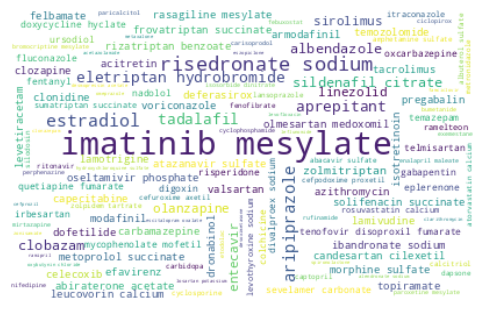

In [ ]:
# Aggregate total manufacturing count for each generic name over 5 years
generic_counts = eda_data.groupby("gnrc_name")["weighted_average_of_amps"].sum().dropna()

# Convert the counts to a dictionary for word cloud weighting
generic_freq_dict = generic_counts.to_dict()

# Generate the word cloud for 'gnrc_name' based on manufacturing count
generic_wordcloud = WordCloud(
    width=400,
    height=250,
    background_color="white",
    colormap="viridis",
).generate_from_frequencies(generic_freq_dict)

# Plot the word cloud for 'gnrc_name'
plt.figure(figsize=(6, 4))
plt.imshow(generic_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### Understand Distribution of Each Feature

In [ ]:
# List of continuous columns to plot
columns_to_plot = [
    "weighted_average_of_amps",
    "aca_ful",
    "tot_spndng",
    "tot_dsg_unts",
    "tot_clms",
    "tot_benes",
    "avg_spnd_per_dsg_unt_wghtd",
    "avg_spnd_per_clm",
    "avg_spnd_per_bene",
]

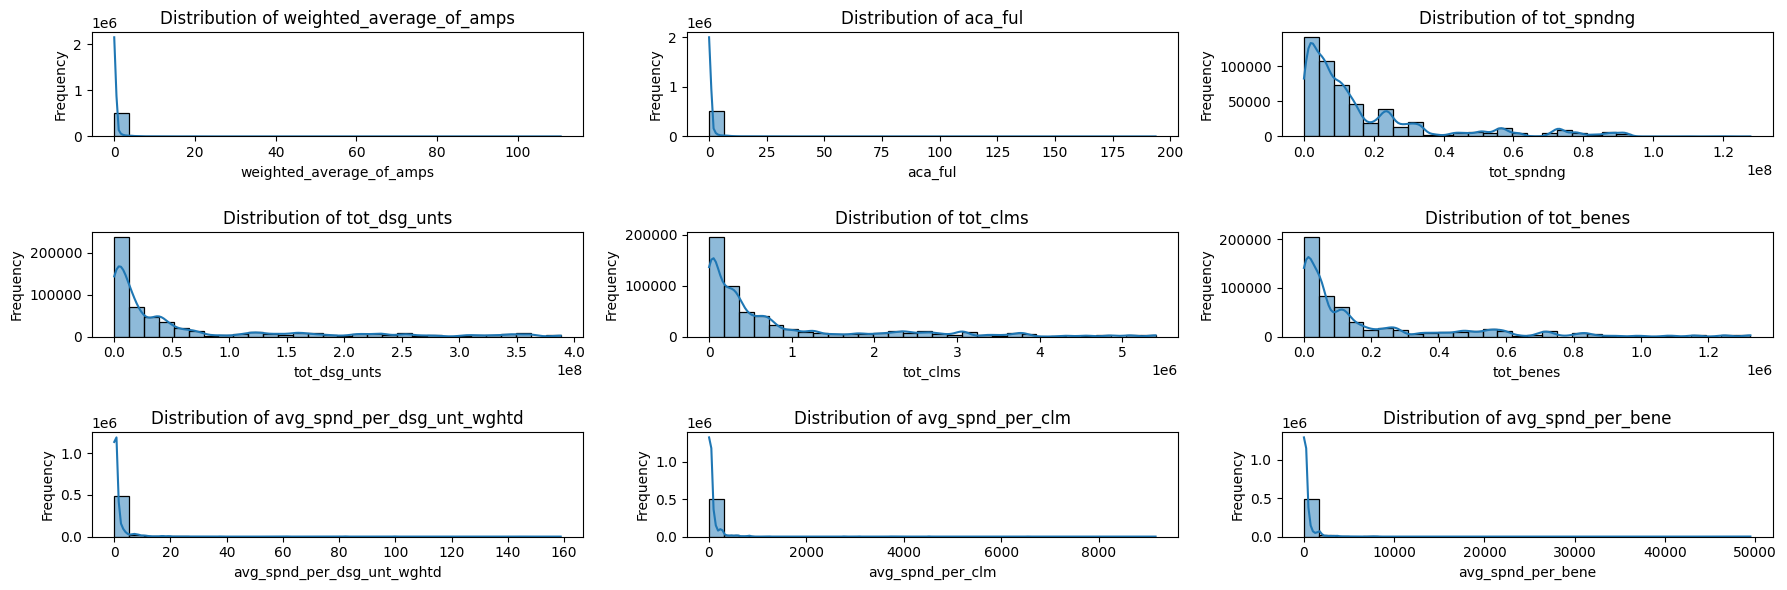

In [ ]:
# Set the plot size
plt.figure(figsize=(18, 6))

# Loop through each column and create a histogram and KDE plot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns, and i-th subplot
    sns.histplot(eda_data[column], kde=True, bins=30)  # kde=True adds kernel density estimation curve
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

<Figure size 1500x1200 with 0 Axes>

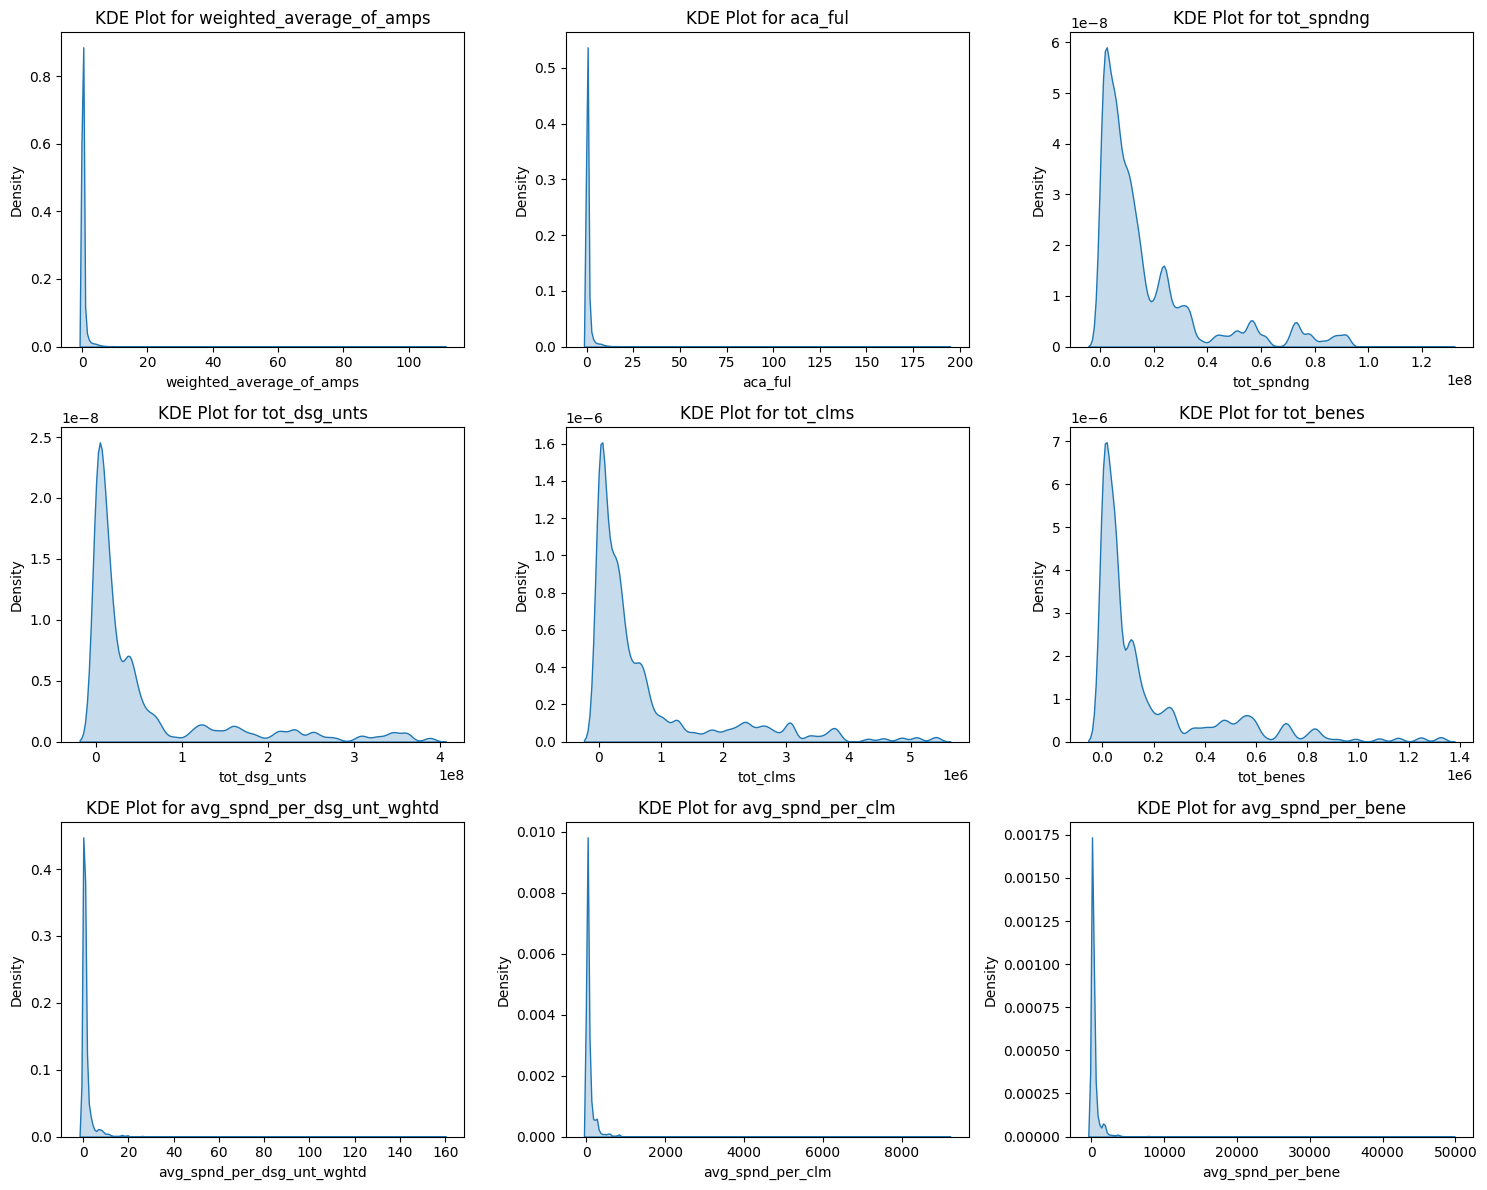

In [ ]:
# Set the plot size for the whole grid
plt.figure(figsize=(15, 12))

# Determine how many rows and columns you need
n_cols = 3  # 3 columns in each row
n_rows = (len(columns_to_plot) // n_cols) + (1 if len(columns_to_plot) % n_cols != 0 else 0)

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

# Flatten axes to make it easier to iterate over
axes = axes.flatten()

# Loop through each column and create a KDE plot
for i, column in enumerate(columns_to_plot):
    sns.kdeplot(eda_data[column], shade=True, ax=axes[i])
    axes[i].set_title(f"KDE Plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Density")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Relationships with Target (Scatterplots)

In [ ]:
# List of continuous features
continuous_features = ['aca_ful', 'package_size', 'year', 'month', 'tot_mftr',
                       'tot_spndng', 'tot_clms', 'tot_benes', 'tot_dsg_unts',
                       'avg_spnd_per_dsg_unt_wghtd', 'avg_spnd_per_clm', 'avg_spnd_per_bene']

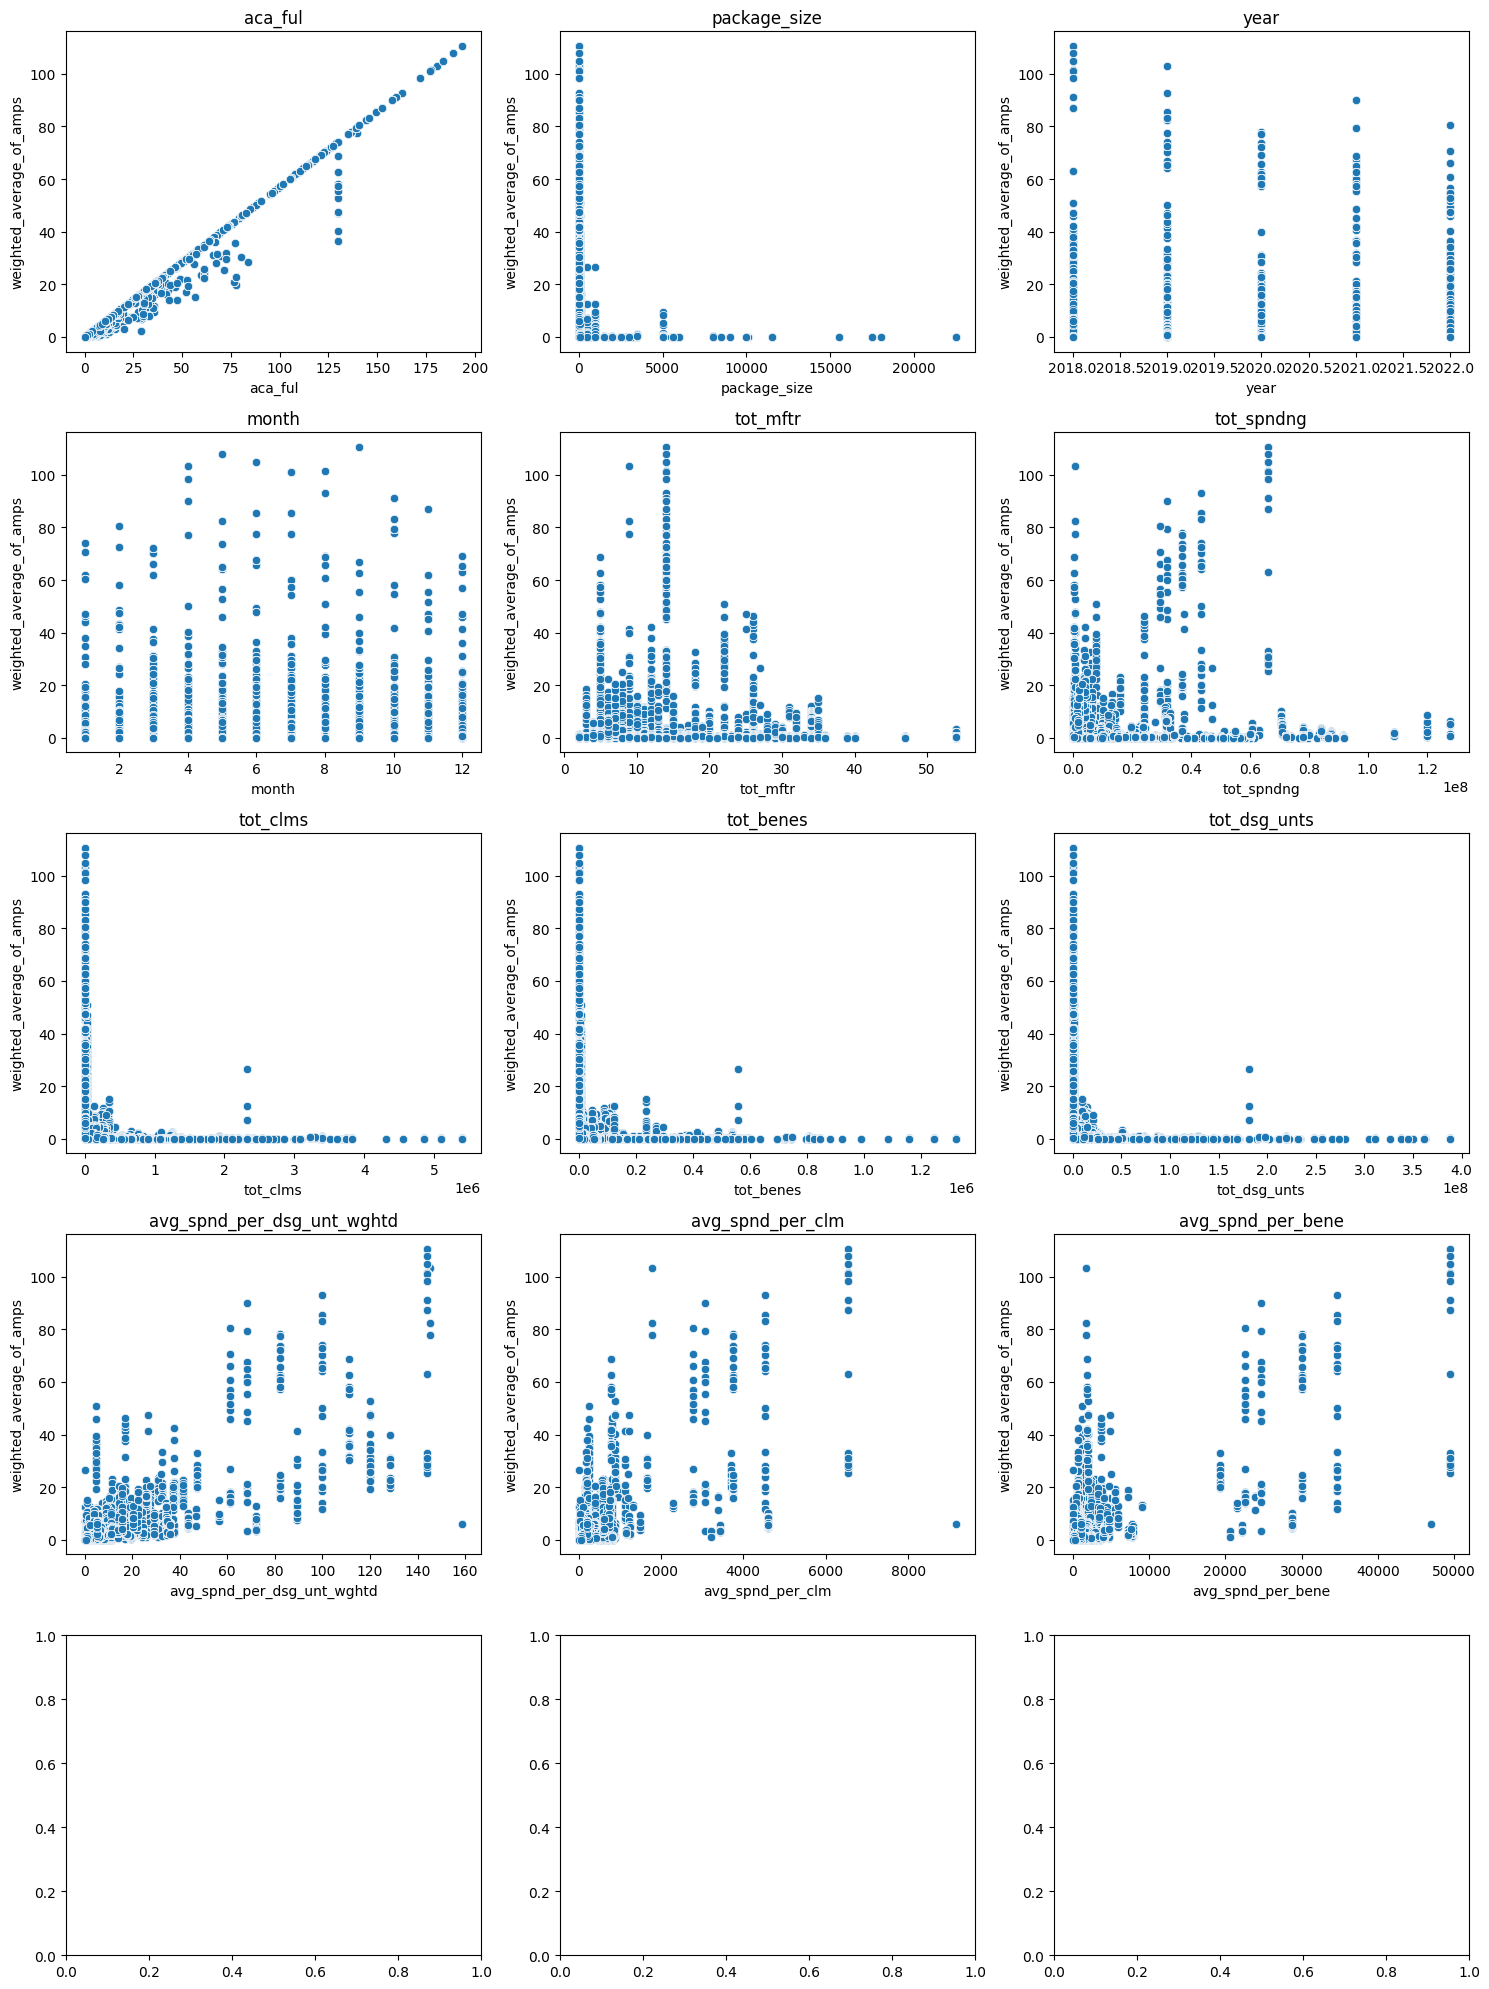

In [ ]:
# Target variable
target_column = "weighted_average_of_amps"

# Set up the plotting grid (3 plots per row)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.ravel()

# Loop through the continuous features and create scatterplots
for i, feature in enumerate(continuous_features):
    sns.scatterplot(x=eda_data[feature], y=eda_data[target_column], ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target_column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

We analyzed how each feature relates to our target variable. If the relationship is not linear, we might create new polynomial features to better capture patterns. Features showing step changes may benefit from grouping values into ranges (binning), and clumped values might suggest underlying categories we can explore further.

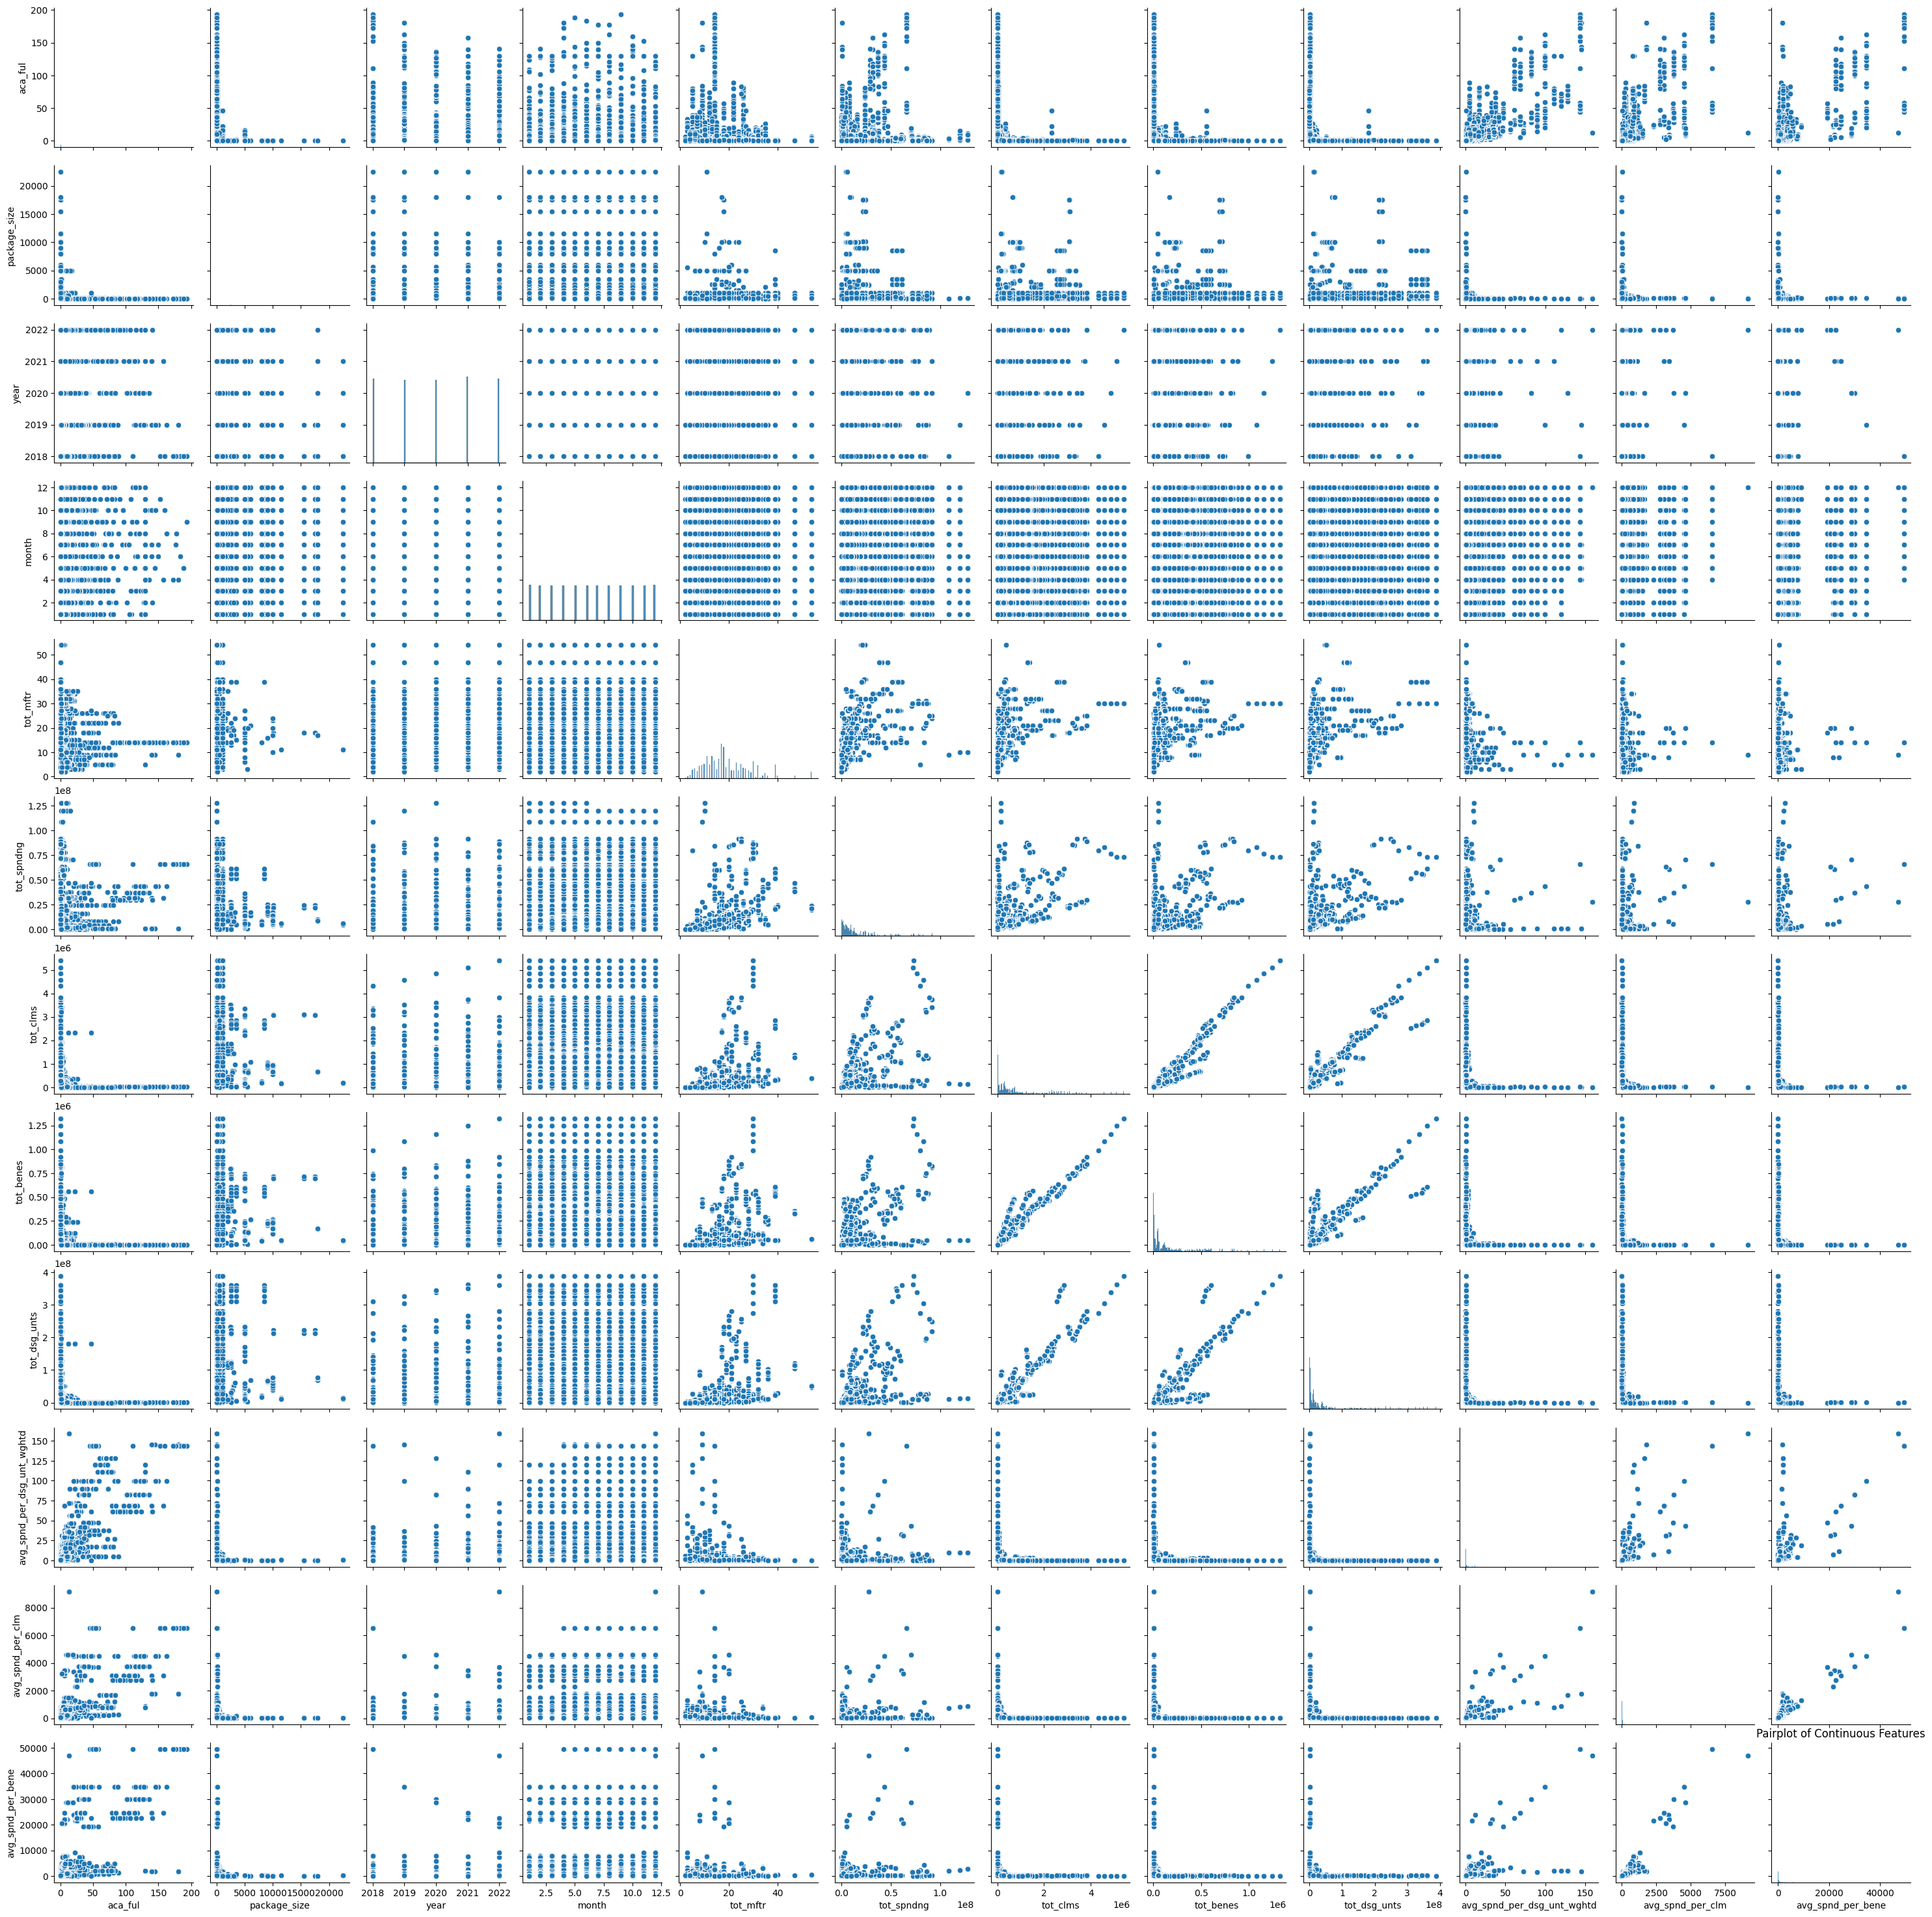

In [ ]:
# Pairplot for all continuous features
sns.pairplot(eda_data[continuous_features])
plt.title('Pairplot of Continuous Features')
plt.show()

### Check for outliers

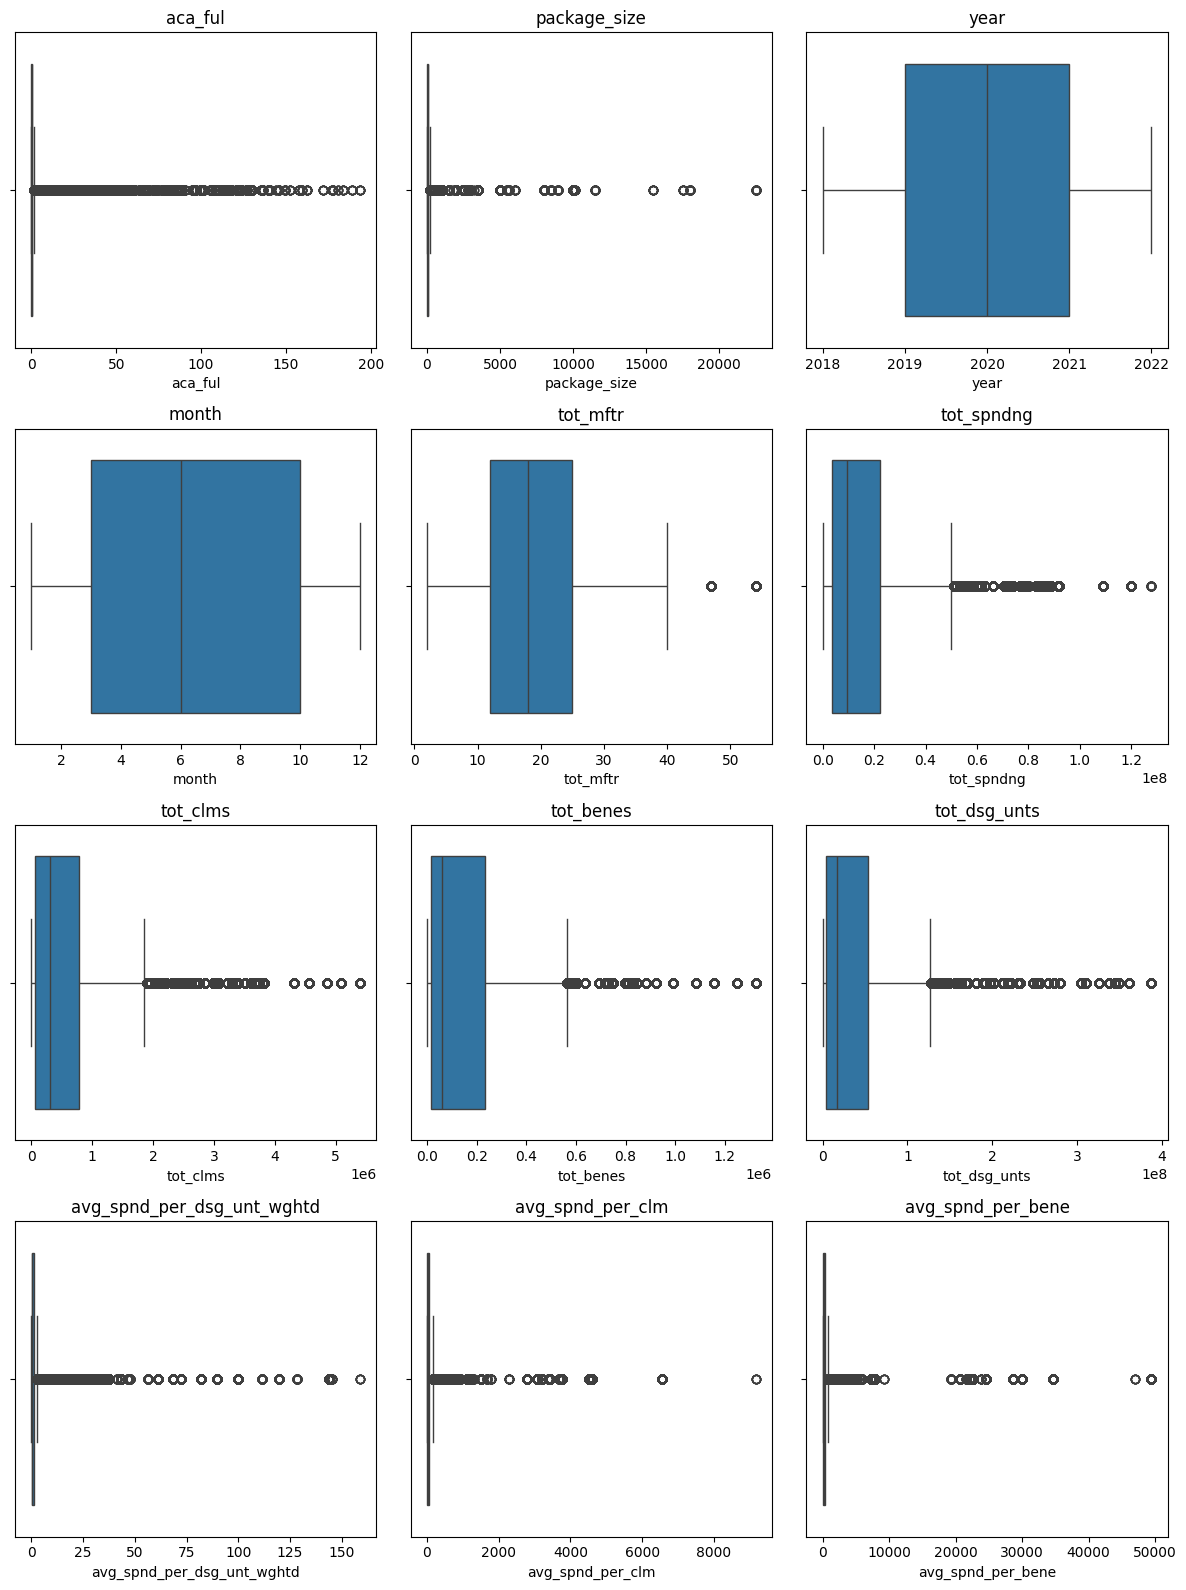

In [ ]:
# Calculate number of rows and columns needed for the subplots
num_features = len(continuous_features)
num_cols = 3  # Number of columns in the plot grid
num_rows = math.ceil(num_features / num_cols)  # Number of rows needed

# Set up the figure size
plt.figure(figsize=(12, 4 * num_rows))

# Loop through the features to create boxplots
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=eda_data[feature])
    plt.title(f'{feature}')

plt.tight_layout()
plt.show()

## Feature Engineering

In [ ]:
# 1. Create a new 'date' column combining 'year' and 'month'
eda_data["date"] = pd.to_datetime(
    eda_data["year"].astype(str) + "-" + eda_data["month"].astype(str) + "-01"
)

# 2. Calculate the time since patent approval
eda_data["time_since_approval"] = (eda_data["date"] - eda_data["approval_date"]).dt.days

# 3. Calculate the time until or since patent expiration
eda_data["time_until_expiration"] = (
    eda_data["patent_expire_date"] - eda_data["date"]
).dt.days

# Display the resulting DataFrame with the new columns
eda_data

product_group    ingredient strength   dosage route mdr_unit_type  \
0                3236    olanzapine    7.5mg   tablet  oral           tab   
1                2095   fluconazole    150mg   tablet  oral           tab   
2                3232    olanzapine     20mg   tablet  oral           tab   
3                1953    gabapentin    100mg  capsule  oral           cap   
4                2276  azithromycin    500mg   tablet  oral           tab   
...               ...           ...      ...      ...   ...           ...   
527659           2398    topiramate     50mg   tablet  oral           tab   
527660           4072     valsartan     80mg   tablet  oral           tab   
527661           2353     meloxicam     15mg   tablet  oral           tab   
527662             60    alprazolam   0.25mg   tablet  oral           tab   
527663           2398    topiramate     50mg   tablet  oral           tab   

        weighted_average_of_amps   aca_ful  package_size            ndc  ...  \
0                       0.103186  0.180576          30.0    62756055383  ...   
1                       0.468832  1.072880           1.0    16714069210  ...   
2                       0.587350  1.027863          30.0    33342007207  ...   
3                       0.024458  0.042802         500.0  71093-0120-05  ...   
4                       0.677082  1.410490          30.0  50268-0104-13  ...   
...                          ...       ...           ...            ...  ...   
527659                  0.065687  0.114952        1000.0  69097-0123-15  ...   
527660                  0.647782  1.133619          90.0  00378-5813-77  ...   
527661                  0.011474  0.023160           1.0  60687-0199-11  ...   
527662                  0.021103  0.036930        1000.0    59762371904  ...   
527663                  0.065687  0.114952          60.0  69097-0817-03  ...   

        te_code   type approval_date  patent_expire_date          applicant  \
0           NaN  discn    2016-08-30          2036-08-30  ajanta pharma ltd   
1            ab     rx    1990-01-29          2010-01-29             pfizer   
2           NaN  discn    2016-08-30          2036-08-30  ajanta pharma ltd   
3            ab     rx    2003-09-12          2023-09-12  actavis elizabeth   
4            ab     rx    2020-01-28          2040-01-28            alembic   
...         ...    ...           ...                 ...                ...   
527659       ab     rx    1996-12-24          2016-12-24     janssen pharms   
527660       ab     rx    2002-08-14          2022-08-14           novartis   
527661       ab     rx    2006-07-19          2026-07-19   aiping pharm inc   
527662       ab     rx    1993-10-31          2013-10-31  actavis elizabeth   
527663       ab     rx    1996-12-24          2016-12-24     janssen pharms   

                                      applicant_full_name  inflation_rate  \
0                                       ajanta pharma ltd             2.1   
1                                 pfizer central research             2.2   
2                                       ajanta pharma ltd             2.8   
3                                   actavis elizabeth llc             1.8   
4                             alembic pharmaceuticals ltd             1.9   
...                                                   ...             ...   
527659                        janssen pharmaceuticals inc             7.9   
527660                      novartis pharmaceuticals corp             2.3   
527661                          aiping pharmaceutical inc             7.5   
527662  actavis elizabeth llc an indirect wholly owned...             2.9   
527663                        janssen pharmaceuticals inc             7.9   

             date  time_since_approval  time_until_expiration  
0      2018-01-01                  489                   6816  
1      2018-11-01                10503                  -3198  
2      2018-05-01                  609                  

We're transforming the `month` feature using sine and cosine to help the model understand that months follow a cycle, where January comes after December, rather than treating them as unrelated numbers.

In [ ]:
# Apply sine and cosine transformations to 'month' to capture the cyclical nature
eda_data['month_sin'] = np.sin(2 * np.pi * eda_data['month'] / 12)
eda_data['month_cos'] = np.cos(2 * np.pi * eda_data['month'] / 12)

### Polynomial Features

In [ ]:
# Create interaction features to capture combined effects of supply, demand, and cost

eda_data['tot_mftr_x_avg_spnd_per_bene'] = (eda_data['tot_mftr'] * eda_data['avg_spnd_per_bene'])

eda_data['tot_mftr_x_tot_benes'] = (
    eda_data['tot_mftr'] * eda_data['tot_benes']
)

eda_data['avg_dsg_units_per_clm'] = (
    eda_data['tot_dsg_unts'] / eda_data['tot_clms']
).replace(0, np.nan)

eda_data['utilization_rate'] = (
    eda_data['tot_dsg_unts'] / eda_data['tot_benes']
).replace(0, np.nan)

# Add time-based interaction features
eda_data['time_since_approval_x_avg_spnd_per_dsg_unt_wghtd'] = (
    eda_data['time_since_approval'] * eda_data['avg_spnd_per_dsg_unt_wghtd']
)

eda_data['time_until_expiration_x_avg_spnd_per_bene'] = (
    eda_data['time_until_expiration'] * eda_data['avg_spnd_per_bene']
)

eda_data['expiration_to_approval_ratio'] = (
    eda_data['time_until_expiration'] / (eda_data['time_since_approval'] + 1)
)

eda_data['utilization_rate_x_time_since_approval'] = (
    eda_data['utilization_rate'] * eda_data['time_since_approval']
)

eda_data['time_until_expiration_x_tot_spndng'] = (
    eda_data['time_until_expiration'] * eda_data['tot_spndng']
)

eda_data['time_until_expiration_x_tot_mftr'] = (
    eda_data['time_until_expiration'] * eda_data['tot_mftr']
)

# Round new features for clean output
round_cols = [
    'tot_mftr_x_avg_spnd_per_bene', 'tot_mftr_x_tot_benes', 'avg_dsg_units_per_clm',
    'utilization_rate', 'time_since_approval_x_avg_spnd_per_dsg_unt_wghtd',
    'time_until_expiration_x_avg_spnd_per_bene', 'expiration_to_approval_ratio',
    'utilization_rate_x_time_since_approval', 'time_until_expiration_x_tot_spndng',
    'time_until_expiration_x_tot_mftr'
]

eda_data[round_cols] = eda_data[round_cols].round(4)

Interaction Feature  (Supply, Demand, Treatment Intensity & Lifecycle)

These interaction features are designed to capture **nonlinear relationships** and **latent patterns** across dimensions of **supply, demand, treatment intensity, and regulatory lifecycle** — all critical factors in drug pricing behavior.


Feature Interpretations

- **`tot_mftr_avg_spnd_per_bene`**  
  Combines the number of manufacturers with average spend per beneficiary. Reflects **market-driven pricing pressure** and possible supply-demand cost dynamics.

- **`tot_mftr_tot_benes`**  
  Represents the **scale of market engagement**. High values may signal broader market penetration or **competition intensity**.

- **`avg_dsg_units_per_clm`**  
  Shows the **average number of dosage units used per claim**, which reflects **treatment intensity per service**.

- **`utilization_rate`**  
  Measures **average dosage unit usage per beneficiary**, offering insight into **treatment breadth and intensity** across the population.

- **`time_since_approval_x_avg_spnd_per_dsg_unt_wghtd`**  
  Interacts **drug maturity** with **unit cost**, possibly capturing **price decay or stabilization** over time.

- **`time_until_expiration_x_avg_spnd_per_bene`**  
  Combines **patent duration left** with **beneficiary-level cost** — could indicate **pricing strategy pre-generic entry**.

- **`expiration_to_approval_ratio`**  
  A normalized measure of lifecycle phase — can help reveal whether the product is in a **growth, maturity, or decline** phase.

- **`utilization_rate_x_time_since_approval`**  
  Evaluates whether **older drugs** are being **used more or less**, providing insights into **long-term adoption or obsolescence**.

- **`time_until_expiration_x_tot_spndng`**  
  Reflects **revenue potential** over remaining exclusivity period — high spend with short time left could flag **pre-expiry price increases**.

- **`time_until_expiration_x_tot_mftr`**  
  Captures the relationship between **competition** and **patent duration**, potentially revealing **barriers to entry** or **market saturation** dynamics.


These features improve model performance by exposing **underlying structural dynamics** not evident in individual variables alone.


### Feature Scaling

In [ ]:
# List of columns to apply log transformation (based on skewness analysis)
skewed_cols_to_transform = [
    'expiration_to_approval_ratio', 'time_until_expiration_x_avg_spnd_per_bene',
    'package_size', 'aca_ful', 'avg_spnd_per_bene', 'tot_mftr_x_avg_spnd_per_bene',
    'avg_spnd_per_clm', 'time_since_approval_x_avg_spnd_per_dsg_unt_wghtd',
    'avg_spnd_per_dsg_unt_wghtd', 'time_until_expiration_x_tot_spndng',
    'product_no', 'tot_mftr_x_tot_benes', 'utilization_rate',
    'tot_dsg_unts', 'tot_clms', 'avg_dsg_units_per_clm', 'tot_benes',
    'tot_spndng', 'product_group', 'utilization_rate_x_time_since_approval',
    'tot_mftr', 'inflation_rate'
]

# Apply log1p (log(x + 1)) transformation to the identified columns
eda_data[skewed_cols_to_transform] = eda_data[skewed_cols_to_transform].apply(np.log1p)

In [ ]:
# Check for missing values in the transformed columns
missing_values = eda_data[skewed_cols_to_transform].isnull().sum()
missing_values = missing_values[missing_values > 0]

print("Columns with missing values after log transformation:\n")
print(missing_values)

Columns with missing values after log transformation:

expiration_to_approval_ratio                         31622
time_until_expiration_x_avg_spnd_per_bene           175806
time_since_approval_x_avg_spnd_per_dsg_unt_wghtd     31622
time_until_expiration_x_tot_spndng                  175806
utilization_rate_x_time_since_approval               31622
dtype: int64


In [ ]:
# Replace missing values with median for numeric columns
numeric_cols = eda_data.select_dtypes(include=["number"]).columns

eda_data[numeric_cols] = eda_data[numeric_cols].apply(lambda x: x.fillna(x.median()))


In [ ]:
# List of numerical columns (to be scaled)
numerical_columns = [
    'weighted_average_of_amps', 'aca_ful', 'package_size', 'tot_mftr', 'tot_spndng',
    'tot_clms', 'tot_benes', 'tot_dsg_unts', 'avg_spnd_per_dsg_unt_wghtd', 'avg_spnd_per_clm',
    'avg_spnd_per_bene', 'avg_dsg_units_per_clm', 'utilization_rate', 'tot_mftr_x_avg_spnd_per_bene',
    'time_until_expiration_x_avg_spnd_per_bene', 'time_since_approval_x_avg_spnd_per_dsg_unt_wghtd',
    'time_until_expiration_x_tot_spndng', 'tot_mftr_x_tot_benes', 'utilization_rate_x_time_since_approval',
    'inflation_rate', 'product_no'
]

In [ ]:
# Apply scaling only to the numerical columns
scaler = RobustScaler()

# Scale the numerical columns and update the DataFrame
eda_data[numerical_columns] = scaler.fit_transform(eda_data[numerical_columns])

## Feature Selection

In [ ]:
corr_columns = eda_data[
    [
        "tot_spndng",
        "tot_mftr",
        "tot_dsg_unts",
        "tot_clms",
        "tot_benes",
        "avg_spnd_per_dsg_unt_wghtd",
        "avg_spnd_per_clm",
        "avg_spnd_per_bene",
        "aca_ful",
        "avg_dsg_units_per_clm",
        "utilization_rate",
        "year",
        "month",
        "time_since_approval",
        "time_until_expiration",
        "expiration_to_approval_ratio",
        "time_until_expiration_x_avg_spnd_per_bene",
        "package_size",
        "time_since_approval_x_avg_spnd_per_dsg_unt_wghtd",
        "tot_mftr_x_avg_spnd_per_bene",
        "time_until_expiration_x_tot_spndng",
        "tot_mftr_x_tot_benes",
        "utilization_rate_x_time_since_approval",
        "inflation_rate",
        "weighted_average_of_amps"
    ]
]

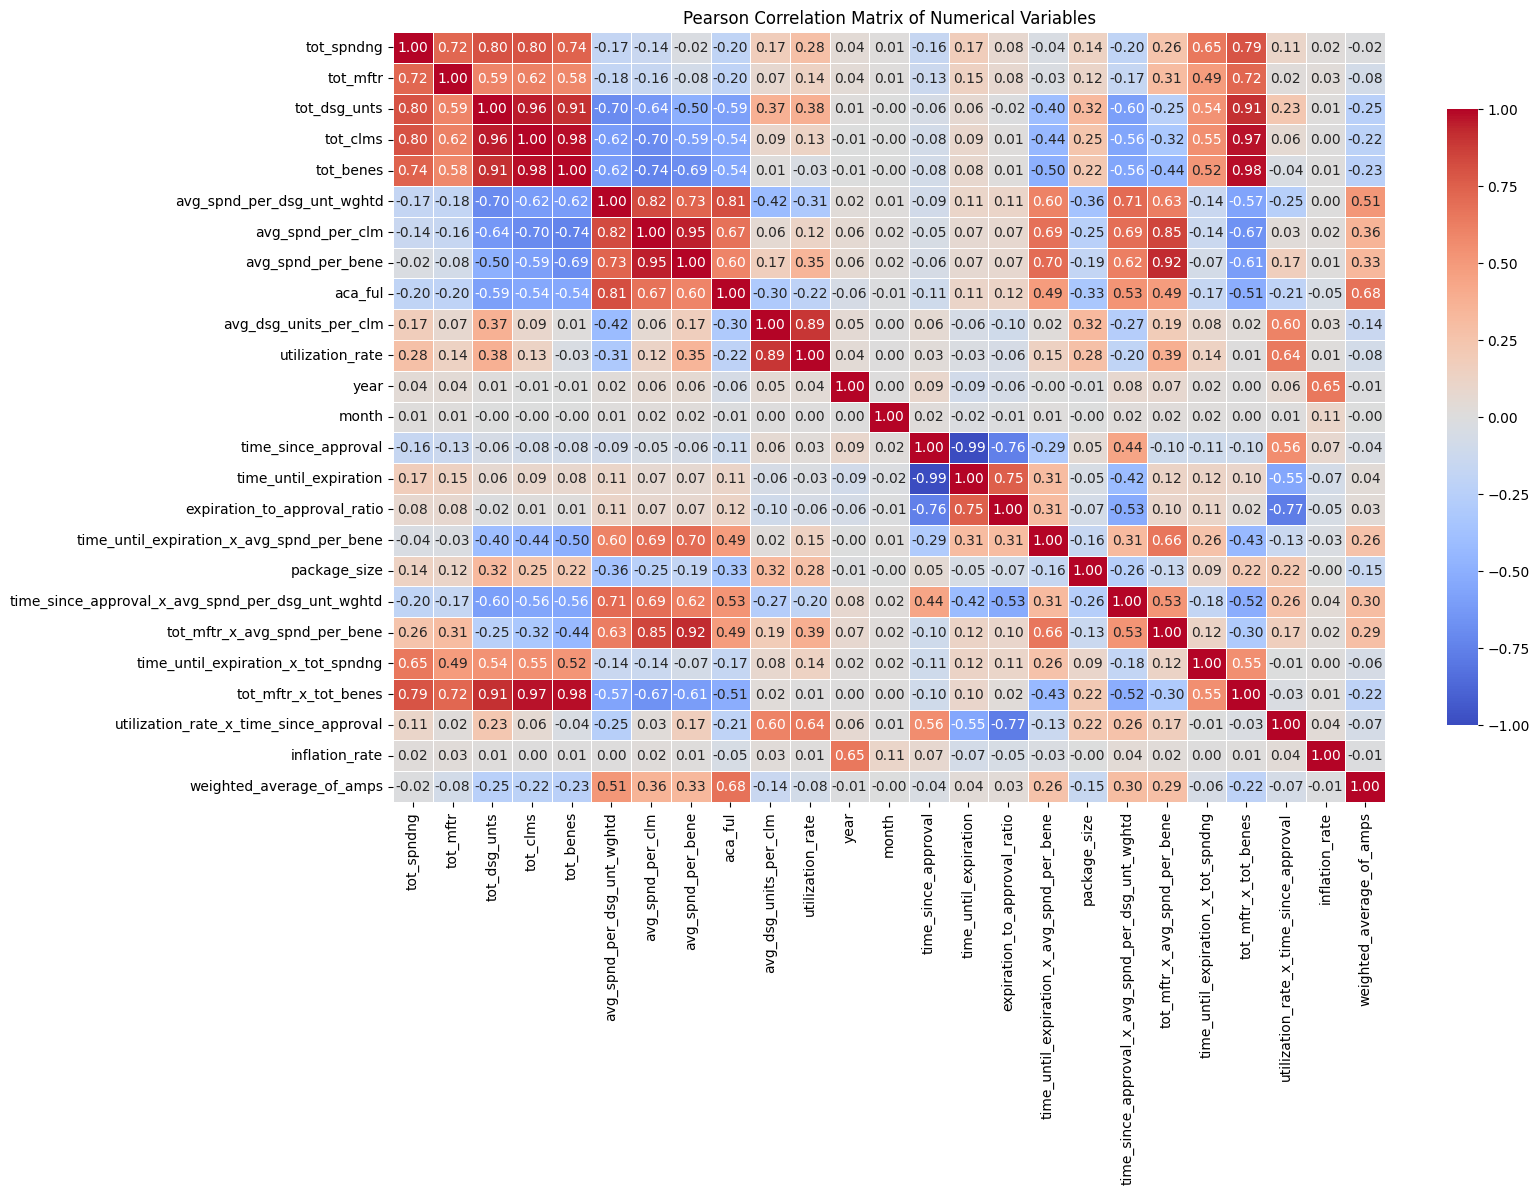

In [ ]:
# Calculate Pearson correlation matrix
pearson_corr_matrix = corr_columns.corr(method="pearson")

# Set the figure size
plt.figure(figsize=(16, 10))

# Create a heatmap to visualize the Pearson correlation matrix
sns.heatmap(
    pearson_corr_matrix,
    annot=True,  # Show correlation values on the heatmap
    cmap="coolwarm",  # Color map for the heatmap
    fmt=".2f",  # Format for correlation values
    linewidths=0.5,  # Line thickness between cells
    cbar_kws={"shrink": 0.8},  # Color bar options
    vmin=-1,
    vmax=1,  # Set min and max values for better contrast
)

# Set the title
plt.title("Pearson Correlation Matrix of Numerical Variables")

# Show the plot
plt.show()


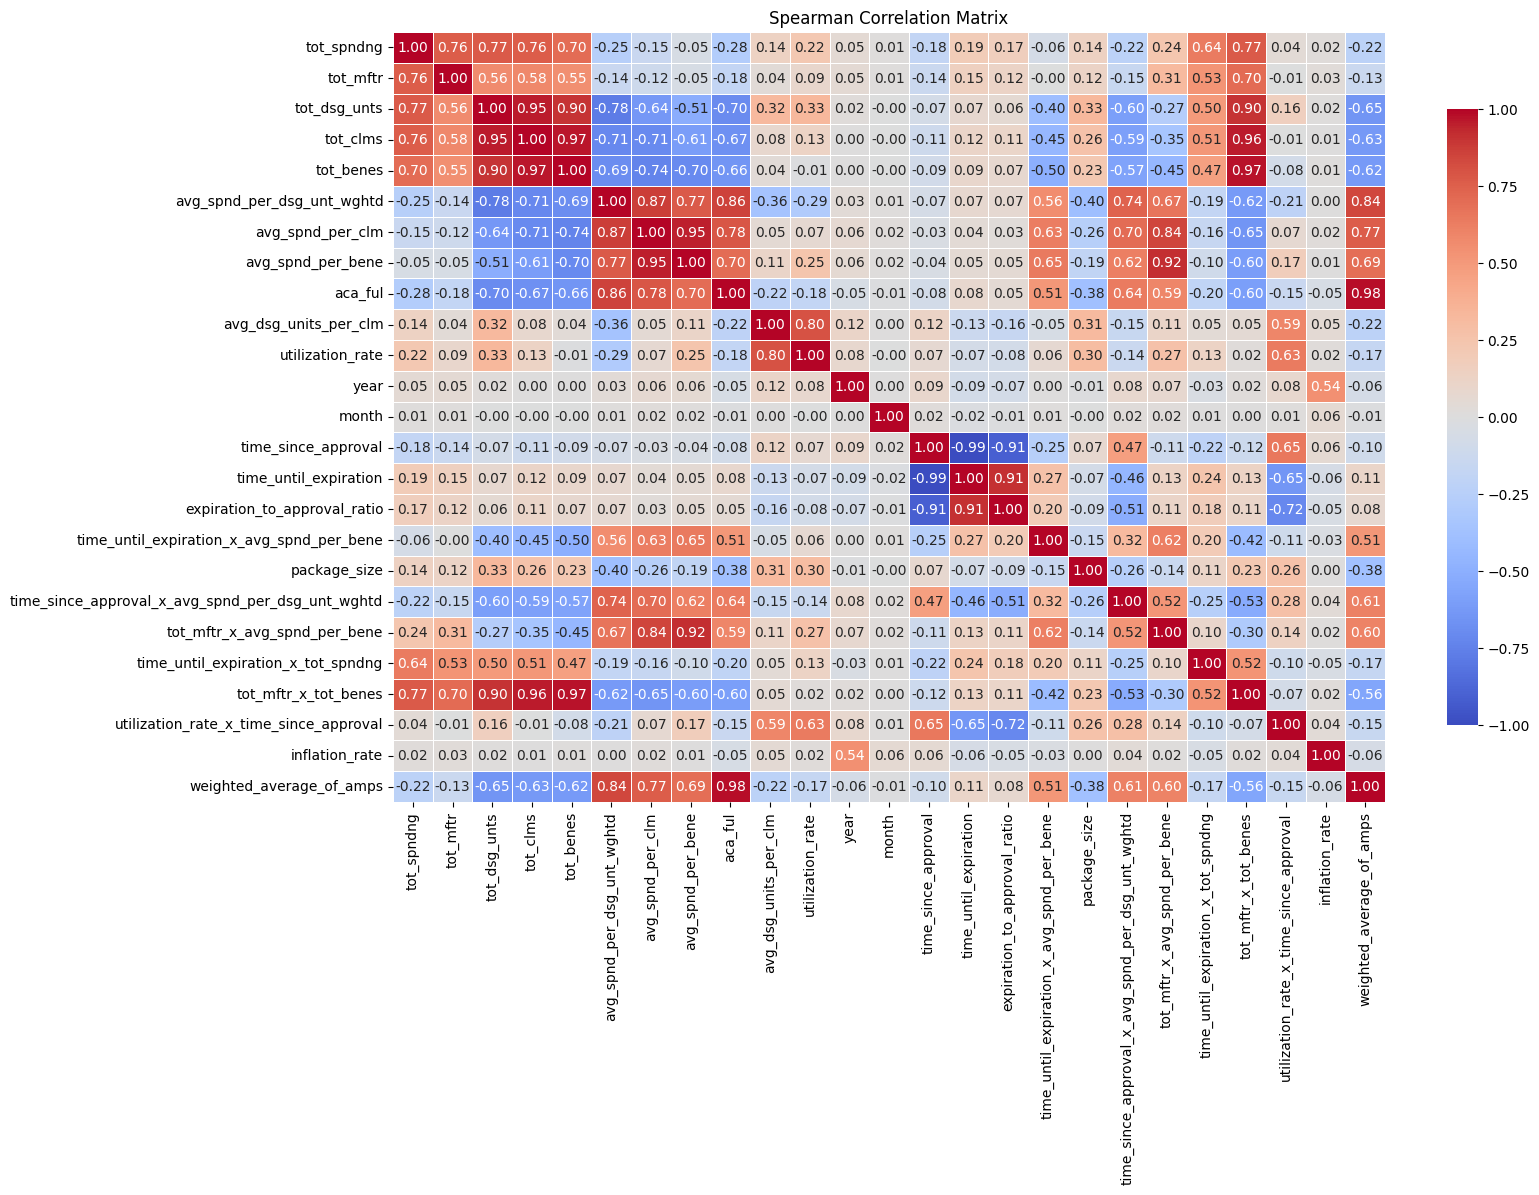

In [ ]:
# Calculate Spearman correlation matrix
spearman_corr_matrix = corr_columns.corr(method="spearman")

# Set figure size
plt.figure(figsize=(16, 10))

# Create a heatmap for Spearman correlation
sns.heatmap(
    spearman_corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    vmin=-1,
    vmax=1,
)

# Set title
plt.title("Spearman Correlation Matrix")

# Show plot
plt.show()

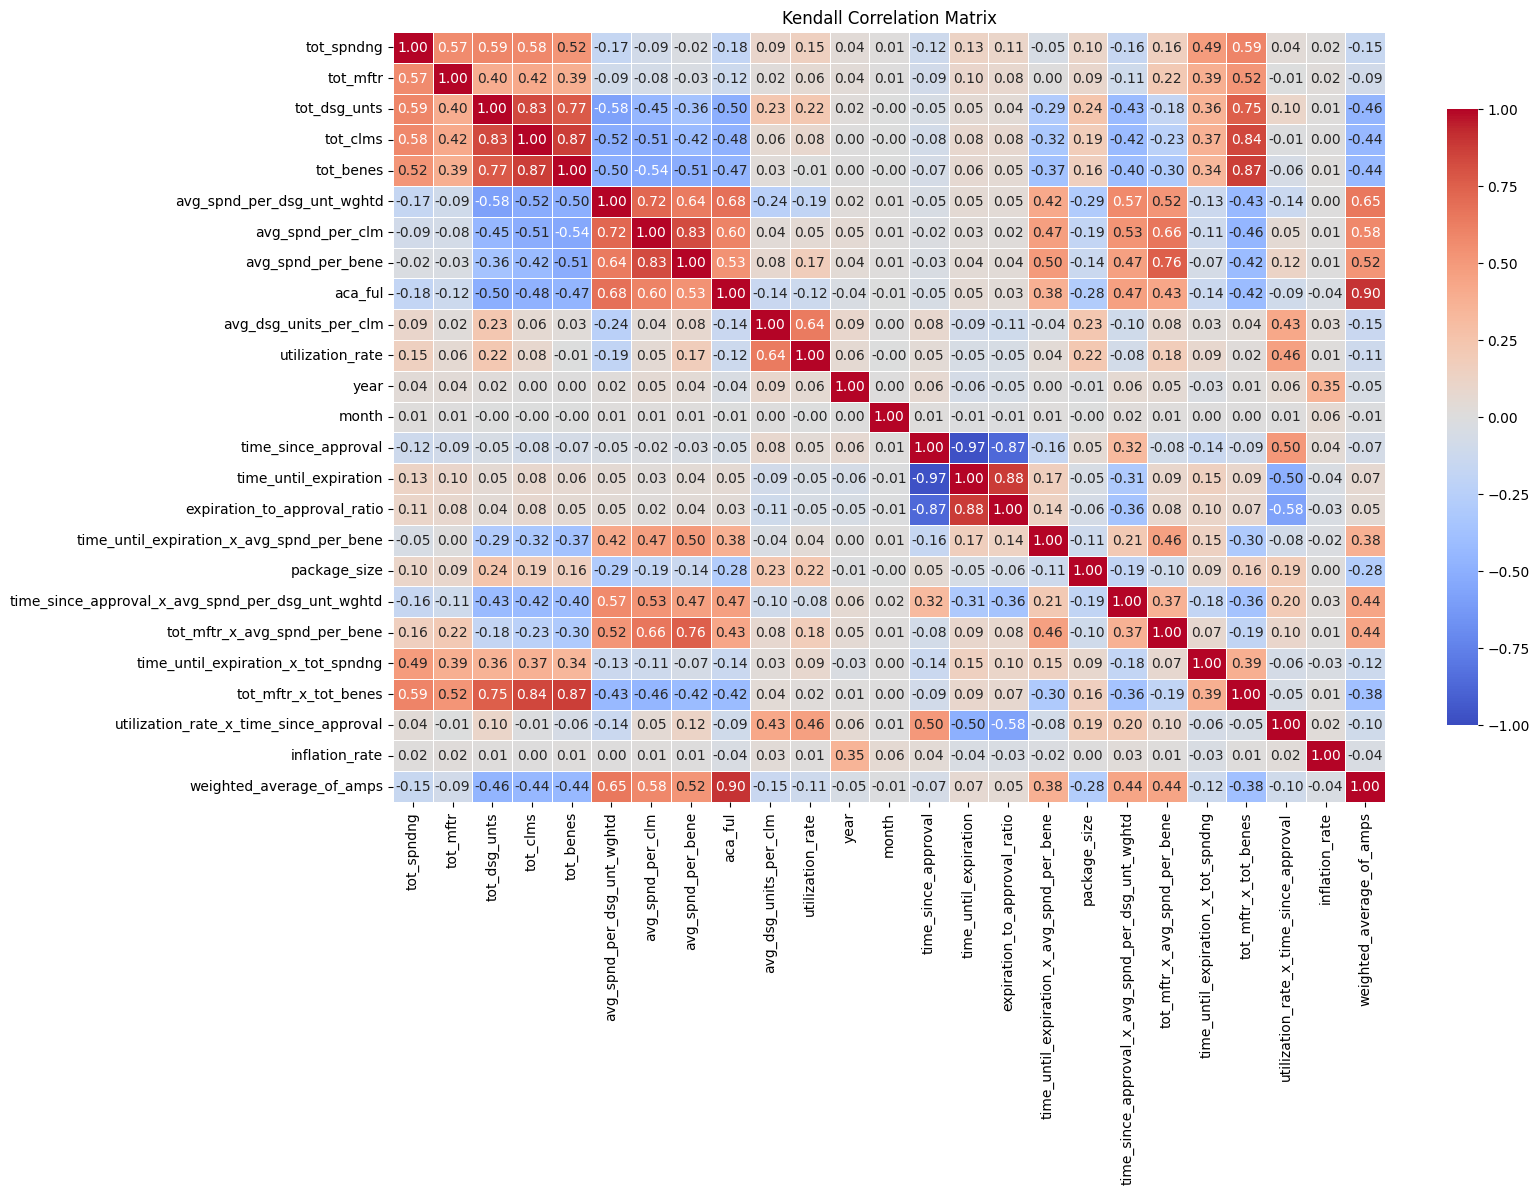

In [ ]:
# Calculate Kendall correlation matrix
kendall_corr_matrix = corr_columns.corr(method="kendall")

# Set figure size
plt.figure(figsize=(16, 10))

# Create a heatmap for Kendall correlation
sns.heatmap(
    kendall_corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    vmin=-1,
    vmax=1,
)

# Set title
plt.title("Kendall Correlation Matrix")

# Show plot
plt.show()

## Final Dataset

In [ ]:
model_drug_patent = eda_data.copy()

In [ ]:
# Define the path to save the CSV file in Google Drive
repo_path = '/content/drive/My Drive/DATA_606'
save_path = os.path.join(repo_path, 'data')

# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

# Save the dataset as a CSV file
csv_file_path = os.path.join(save_path, 'model_drug_patent.csv')
model_drug_patent.to_csv(csv_file_path, index=False)

print(f"Dataset saved successfully at: {csv_file_path}")

Dataset saved successfully at: /content/drive/My Drive/DATA_606/data/model_drug_patent.csv
